<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


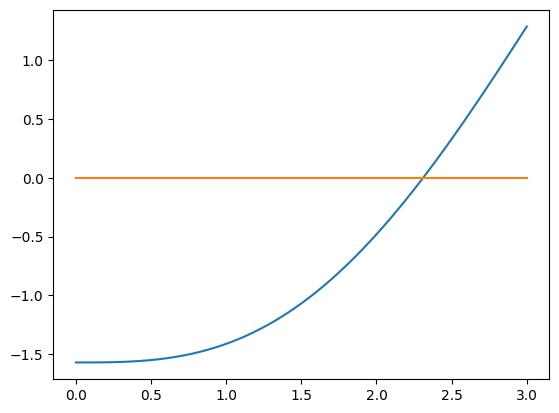

In [2]:
#Punto 1
import numpy as np
import matplotlib.pyplot as plt
f=lambda x: x-np.sin(x)-np.pi/2
x=np.linspace(0, 3, 1000)
plt.plot(x, f(x))
plt.plot(x, [0]*len(x))
# Podemos ver en la gráfica que el cero está alrededor de 2.3

In [3]:
# Utilizando el método de Newton
from scipy import optimize
B=optimize.bisect(f, 0, 4)
F=optimize.fixed_point(lambda x: np.sin(x)+np.pi/2, 2)
N=optimize.newton(f, 0)
S=optimize.root_scalar(f, method="secant", x0=1)
print(f"""Los resultados son:\n
    Bisección: {B}\n
    Punto fijo: {F}\n
    Newton: {N}\n
    Secante: {S.root}""")


Los resultados son:

    Bisección: 2.309881460010729

    Punto fijo: 2.3098814600100575

    Newton: 2.309881460010057

    Secante: 2.3098814600100575


In [4]:
# Punto 2

m=0.25
l=300

h=lambda t: l-(32.17*m/0.1)*t+(m**2*32.17/0.1)*t*(1-np.e**(-0.1*t/m))

# Podemos ver que el momento en el que el objeto da contra el suelo es aproximadamente 4.73
B=optimize.bisect(h, 3, 5)
F=optimize.fixed_point(lambda t: t-h(t), 4.5)
N=optimize.newton(h, 4.5)
S=optimize.root_scalar(h, method="secant", x0=4)
print(f"""Los resultados son:\n
    Bisección: {B}\n
    Punto fijo: {F}\n
    Newton: {N}\n
    Secante: {S.root}""")




Los resultados son:

    Bisección: 4.736139137605278

    Punto fijo: 4.73613913760349

    Newton: 4.73613913760349

    Secante: 4.73613913760349


0.9575040240772689 0.9575040240772689


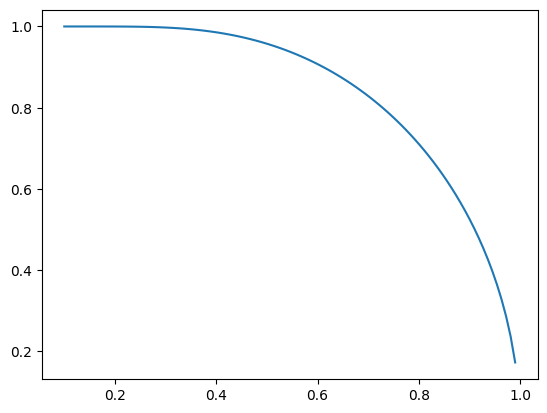

In [13]:
#Punto 3
g=lambda x: x-np.tanh(x/0.5)

S=optimize.root_scalar(g, method="secant", x0=4)
F=optimize.fixed_point(lambda x: np.tanh(x/0.5), 1)

T = np.linspace(0.1,0.99,100)

def m(T):
    return optimize.root_scalar(lambda x: x-np.tanh(x/T), method="secant", x0=1).root

Y=[m(i) for i in T]
plt.plot(T, Y)
print(S.root,F)



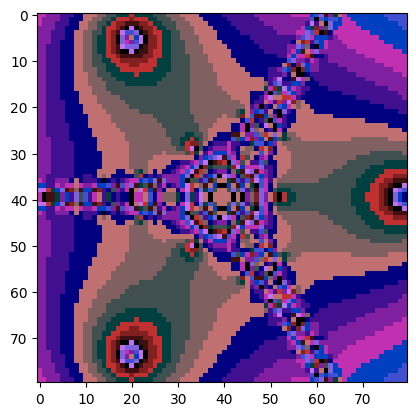

In [17]:

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if(abs(Z-Z_0)<= eps):
          break 

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)